## Part A: Analysing Software Development Methodologies Books (text data)

#### Developer: Anh Van
#### Email: ngockhueanhvan@gmail.com
Date: 10/08/2019
Version: 1.0
Environment: Python 3.5 and Jupyter Notebook

#### Libraries used:
- re
- nltk
- matplotlib

#### Introduction:
- We are going to look into modern software development methodologies.
- The daily job of a data scientist/ data engineer/ software engineer involves working in a  project team and following software development methodologies to develop software products or to do data analysis.
- To prepare for such a career, it would be useful to have knowledge on the common software development methodologies
- We are goin to analyse two books on software development methodologies. We will see the distribution of words, the most common words in both books and the average frequency. This approach can also be scaled to find the most common words and distribution of all words in the Internet
- Required dataset: 
        - Book 1: "Agile Processes in Software Engineer and Extreme Programming.txt"
        - Boook 2: "Scrum Handbook.txt"

### Step 1: Import Pyspark and initialize Spark 
This task involves
- Writing the code to create SparkContext object, which tells Spark how to access a  cluster.
- We first need to build a SparkConf object that contains information about out application
- Give a name for our application and run Spark locally with as many working processors as logical cores on out machine

In [1]:
# create entry points to spark
from pyspark import SparkContext, SparkConf # Spark
from pyspark.sql import SparkSession # Spark SQL
 
# If there is an existing spark context, we will reuse it instead of creating a new context.
sc = SparkContext.getOrCreate()

# local[*]: run Spark locally with as many working processors as logical cores on our machine.
# In the field of `master`, we use a local server with as many working processors (or threads) as possible (i.e. `local[*]`). 
# The `appName` field is a name to be shown on the Sparking cluster UI. 

# If there is no existing spark context, we now create a new context
if (sc is None):
    sc = SparkContext(master="local[*]", appName="Assignment1_PartA")
    
spark = SparkSession(sparkContext=sc)

### Step 2: Create Resilient Distributed Datasets (RDDs)
This task involves
- Writing the code in pyspark to read the required dataset
- Displaying the total number of lines in each dataset

In [2]:
# count the total number of lines in the variable dataset
def lines(text):
    return text.count()

# count the total number of blank lines in the variable dataset
def blank_lines(text):
    blank = text.filter(lambda x: x=='').count()
    return blank

In [3]:
# load the first book "Scrum Handbook.txt"
scrum = sc.textFile('Scrum Handbook.txt')
# apply the functions to count total number of lines/blank lines and print out the statements
print('"Scrum Handbook":\n - Total number of lines: {0}\n - Total number of blank lines: {1}'.format(lines(scrum), blank_lines(scrum)))
print("")

# similarly, load the second book "Agile Processes in Software Engineering and Extreme Programming.txt"
agile = sc.textFile('Agile Processes  in Software Engineering  and Extreme Programming.txt')
# apply the functions to count total number of lines/blank lines and print out the statements
print('"Agile Process in Software Engineering and Extreme Programming":\n - Total number of lines: {0}\n - Total number of blank lines: {1}'.format(lines(agile), blank_lines(agile)))

"Scrum Handbook":
 - Total number of lines: 4617
 - Total number of blank lines: 2066

"Agile Process in Software Engineering and Extreme Programming":
 - Total number of lines: 21569
 - Total number of blank lines: 7593


### Step 3: Cleaning/Manipulating text
This task involves:
- Removing all characters which are not alphabets expect spaces
- Changing all uppercase letters to lowercase
- Removing all leading or trailing spaces

In [4]:
# import regex library 
import re

In [5]:
# text cleaning function, which would remove all non-alphabet characters, lowercase all letters and remove leading/trailing spaces

def TextCleaning(text):
    
    # define the regex pattern to capture only alphabet characters and spaces
    wordPattern = re.compile(r'([A-Za-z\s]+)')
    
    # capture the words
    rdd = text.map(lambda x: wordPattern.findall(x))
    
    # lowercase all and remove leading/trailing spaces
    rdd = rdd.map(lambda x: ["".join(x)])
    rdd = rdd.map(lambda x: [y.lower() for y in x]) # lowercase
    rdd = rdd.map(lambda x: [y.strip() for y in x]).flatMap(lambda x: x) # leading/trailing spaces
    return rdd

In [6]:
# appply the function to the first book
scrumRDD = TextCleaning(scrum)

# print top 20 results
scrumRDD.take(20)

['jeff sutherlands',
 '',
 'scrum handbook',
 '',
 '',
 '',
 '',
 'everything',
 'you need',
 'to know',
 'to start',
 '',
 'a scrum project',
 'in your',
 'organization',
 '',
 'scrum',
 '',
 'training',
 '']

In [7]:
# apply the function to the agile book
agileRDD = TextCleaning(agile)

# print top 20 results
agileRDD.take(20)

['lnbip',
 '',
 '',
 'i helen sharp',
 '',
 'tracy hall eds',
 '',
 'agile processes',
 'in software engineering',
 'and extreme programming',
 '',
 'th international conference xp',
 'edinburgh uk may',
 'proceedings',
 '',
 '',
 'springer open',
 '',
 '',
 '']

### Step 4: Transforming the data/ Counting the words
This task involves
- Applying a transformation that will split each element of the RDD by its spaces 
- Creating a word pairs, i.e. (agile, 1)
- Counting the frequency of each word and display the top 20 most frequent words

In [8]:
# function to operate the task requirement
def WordCount(textRDD):
    
    # split each line to word by word
    wordRDD = textRDD.flatMap(lambda x: x.split())
    
    # count the frequency of each word and create the word and frequency pairs
    wordCount = wordRDD.map(lambda x: (x,1)).reduceByKey(lambda x,y: x+y)
    
    # swap the order of word and frequency of word within the tuple and sort by ascending order of frequency
    wordResult = wordCount.map(lambda x: (x[1], x[0])).sortByKey(ascending=False, numPartitions=None)
    return wordResult

In [9]:
# apply the function to the first book
scrumWordCount = WordCount(scrumRDD)

# top 20 results
scrumWordCount.take(20)

[(1238, 'the'),
 (537, 'of'),
 (534, 'and'),
 (477, 'to'),
 (451, 'a'),
 (395, 'scrum'),
 (360, 'in'),
 (348, 'is'),
 (260, 'team'),
 (232, 'product'),
 (195, 'for'),
 (181, 'that'),
 (165, 'it'),
 (149, 'on'),
 (146, 'sprint'),
 (142, 'this'),
 (132, 'with'),
 (124, 'as'),
 (119, 'are'),
 (118, 'by')]

In [10]:
# apply function to the second book
agileWordCount = WordCount(agileRDD)

# top 20 results
agileWordCount.take(20)

[(8145, 'the'),
 (3965, 'and'),
 (3944, 'of'),
 (3714, 'to'),
 (3076, 'in'),
 (2701, 'a'),
 (1539, 'is'),
 (1355, 'that'),
 (1194, 'for'),
 (1028, 'as'),
 (1015, 'on'),
 (975, 'we'),
 (969, 'with'),
 (922, 'software'),
 (915, 'this'),
 (784, 'are'),
 (748, 'agile'),
 (741, 'it'),
 (737, 'development'),
 (711, 'was')]

### Step 5: Removing stop words
 This task involves
 - Removing stopwords from the RDD
 - Finding the number of unique words we have in each RDD

In [11]:
# install and import nltk package
# !pip install nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /srv/home/nvan0013/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
# load English stropwords list
from nltk.corpus import stopwords
stopword_list = stopwords.words("english")
stopword_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [13]:
# remove the words from RDD if that word is in stopword list
def RemoveStopWord(rdd):
    removed = rdd.filter(lambda x: x[1] not in stopword_list)
    return removed

In [14]:
# apply function to remove stopwords for the first list
scrumResult = RemoveStopWord(scrumWordCount)
scrumResult.collect()

[(395, 'scrum'),
 (260, 'team'),
 (232, 'product'),
 (146, 'sprint'),
 (98, 'development'),
 (94, 'teams'),
 (92, 'project'),
 (85, 'owner'),
 (79, 'work'),
 (74, 'backlog'),
 (65, 'one'),
 (52, 'management'),
 (52, 'items'),
 (52, 'software'),
 (51, 'new'),
 (48, 'jeff'),
 (45, 'time'),
 (44, 'meeting'),
 (44, 'release'),
 (40, 'first'),
 (35, 'planning'),
 (34, 'sutherlands'),
 (34, 'handbook'),
 (33, 'may'),
 (33, 'item'),
 (32, 'agile'),
 (32, 'code'),
 (31, 'two'),
 (31, 'daily'),
 (30, 'projects'),
 (30, 'sprints'),
 (30, 'process'),
 (30, 'many'),
 (29, 'case'),
 (28, 'better'),
 (27, 'sirsidynix'),
 (27, 'change'),
 (27, 'tasks'),
 (27, 'people'),
 (27, 'distributed'),
 (26, 'scrummaster'),
 (26, 'much'),
 (26, 'list'),
 (25, 'practices'),
 (25, 'end'),
 (25, 'requirements'),
 (24, 'working'),
 (24, 'review'),
 (24, 'scrums'),
 (23, 'developers'),
 (23, 'complete'),
 (23, 'next'),
 (23, 'done'),
 (22, 'sutherland'),
 (22, 'used'),
 (22, 'members'),
 (22, 'also'),
 (21, 'every')

In [15]:
# apply function to remove stopwords for the second list
agileResult = RemoveStopWord(agileWordCount)
agileResult.collect()

[(922, 'software'),
 (748, 'agile'),
 (737, 'development'),
 (554, 'team'),
 (451, 'product'),
 (384, 'work'),
 (363, 'teams'),
 (354, 'project'),
 (343, 'developers'),
 (317, 'research'),
 (311, 'data'),
 (308, 'process'),
 (288, 'one'),
 (281, 'also'),
 (281, 'time'),
 (270, 'study'),
 (269, 'use'),
 (248, 'code'),
 (244, 'used'),
 (230, 'startups'),
 (225, 'customer'),
 (225, 'experience'),
 (220, 'scrum'),
 (219, 'challenges'),
 (217, 'design'),
 (217, 'kanban'),
 (214, 'user'),
 (211, 'different'),
 (197, 'case'),
 (196, 'using'),
 (180, 'license'),
 (180, 'company'),
 (178, 'practices'),
 (176, 'would'),
 (176, 'tools'),
 (176, 'projects'),
 (176, 'need'),
 (174, 'new'),
 (169, 'two'),
 (158, 'quality'),
 (155, 'first'),
 (154, 'engineering'),
 (154, 'j'),
 (153, 'role'),
 (151, 'questions'),
 (151, 'pp'),
 (146, 'xp'),
 (146, 'creative'),
 (146, 'working'),
 (146, 'learning'),
 (145, 'commons'),
 (143, 'ux'),
 (142, 'could'),
 (141, 'business'),
 (141, 'h'),
 (141, 'results'),
 

In [16]:
# function to count the unique words
def UniqueWord(rdd):
    return rdd.count()

In [17]:
# count number of unique words for each book
scrum_unique = UniqueWord(scrumResult) # first book
agile_unique = UniqueWord(agileResult) # second book

# print out the results
print("The number of unique words in 'Scrum Handbook' is: {0}".format(scrum_unique))
print("The number of unique words in 'Agile Processes in Software Engineering & Extreme Programming' is: {0}".format(agile_unique))

The number of unique words in 'Scrum Handbook' is: 2936
The number of unique words in 'Agile Processes in Software Engineering & Extreme Programming' is: 9611


### Step 6: Find the average occurence of a word
This task involves:
- Finding the total number of words
- Finding the total numner of unique words
- Thus, finding the average occurence of a word


In [18]:
# function to find the average occurence of each unique word in given RDD
def AverageOccurence(rdd):
    
    # find the total number of words
    total_words = rdd.map(lambda x: x[0]).reduce(lambda x,y: x+y)
    
    # the number of unique words
    unique_words = rdd.count()
    
    # the average occurence of each unique word
    average_occurence = total_words/unique_words
    return round(average_occurence,2)

In [19]:
# find the average occurence of each word in each book
scrum_average = AverageOccurence(scrumResult) # first book
agile_average = AverageOccurence(agileResult) # second book

# print out the results
print("The average occurence of a word in 'Scrum Handbook' is: {0}".format(scrum_average))
print("The average occurence of a word in 'Agile Processes in Software Engineering & Extreme Programming' is: {0}".format(agile_average))

The average occurence of a word in 'Scrum Handbook' is: 3.68
The average occurence of a word in 'Agile Processes in Software Engineering & Extreme Programming' is: 8.23


### Step 7: Exploratory data analysis
This task involves
- Analysing the distribution of the words using the standard python library - matplotlib
- Comparing the distribution of words in Book 1 and Book 2 
- Comparing the top 15 words in Book 1 and Book 2. Plotting the graphs and explaining understanding of the graph

In [20]:
# import matplotlib library
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [21]:
# !pip install pandas
import pandas as pd
import numpy as np

First, we convert the RDD into dataframe for data visualization

In [22]:
# Agile book
agile_list = agileResult.collect()

# prepare a dict
a_frequency = [agile_list[i][0] for i in range(len(agile_list))]
a_word = [agile_list[i][1] for i in range(len(agile_list))]
agile_dict = {'Frequency': a_frequency, 'Word': a_word}

# create df from dict
agile_df = pd.DataFrame.from_dict(agile_dict)

# add a column on log of frequency for each word
agile_df['Frequency_log'] = np.log(agile_df['Frequency'])
agile_df.head(5)

,Frequency,Word,Frequency_log
0,922,software,6.826545
1,748,agile,6.617403
2,737,development,6.602588
3,554,team,6.317165
4,451,product,6.111467


In [23]:
# Scrum book
scrum_list = scrumResult.collect()

# create a dict
s_frequency = [scrum_list[i][0] for i in range(len(scrum_list))]
s_word = [scrum_list[i][1] for i in range(len(scrum_list))]
s_dict = {'Frequency': s_frequency, 'Word': s_word}

# create df from dict
s_df = pd.DataFrame.from_dict(s_dict)

# add a column on log of frequency for each word
s_df['Frequency_log'] = np.log(s_df['Frequency'])
s_df.head(5)

,Frequency,Word,Frequency_log
0,395,scrum,5.978886
1,260,team,5.560682
2,232,product,5.446737
3,146,sprint,4.983607
4,98,development,4.584967


#### 7.1 Comparing the distribution of words in Book 1 and Book 2 
- The data spans many orders of magnitude and the features of the distribution not quite evident in the linear space.
- Therefore, use log scale (base 10) to plot the graph.
- Explain understanding based on the graphs.

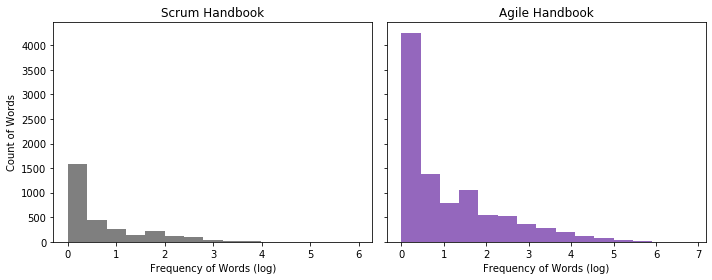

In [24]:
# prepare data
scrum_hist = s_df['Frequency_log']
agile_hist = agile_df['Frequency_log']

# plot
n_bins = 15
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4), sharey=True)

ax1.hist(scrum_hist, bins=n_bins, color='C7')
ax1.set_title('Scrum Handbook')
ax1.set_ylabel('Count of Words')
ax1.set_xlabel('Frequency of Words (log)')

ax2.hist(agile_hist, bins=n_bins, color='C4')
ax2.set_title('Agile Handbook')
ax2.set_xlabel('Frequency of Words (log)')

plt.tight_layout()
plt.show()

> - In general, frequency distribution of words in Agile Hanbook is higher than Scrum Handbook
- In Agile Handbook,there are more words with higher frequency (log) compared to Scrum (log of frequnecy is more than 3)
- As computed above, we can also see the mean of frequency of unique word in Agile Hanbook is larger than Scrum Handbook, 8.23 and 3.68, respectively

#### 7.2 Comparing the top 15 words in Book 1 and Book 2
- Comparing the top 15 words in Book 1 and Book 2
- Plotting the graphs and explaining understanding of the graph

In [25]:
# prepare data
scrum_15 = pd.DataFrame(s_df.head(15))
agile_15 = pd.DataFrame(agile_df.head(15))

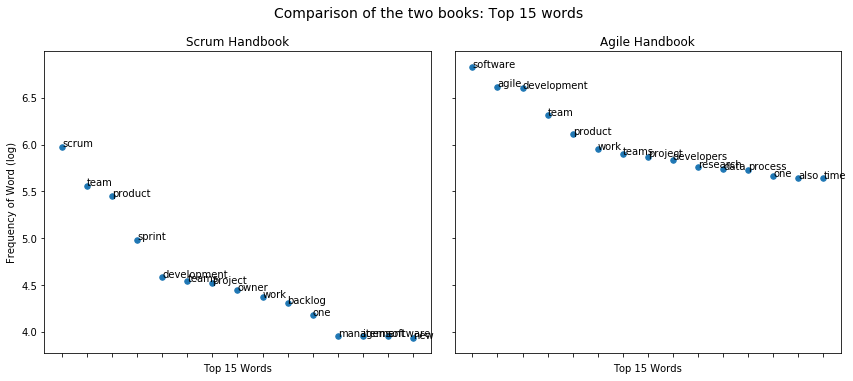

In [29]:
# plot
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), sharey=True)

ax1.scatter(scrum_15['Word'], scrum_15['Frequency_log'], c='C0', s=30)
ax1.set_xlabel('Top 15 Words')
ax1.set_ylabel('Frequency of Word (log)')
# ax1.legend(loc='upper right')
ax1.set_title('Scrum Handbook')
ax1.xaxis.set_ticklabels([])
for i, txt in enumerate(scrum_15['Word']):
    ax1.annotate(txt, (scrum_15['Word'][i], scrum_15['Frequency_log'][i]))

ax2.scatter(agile_15['Word'], agile_15['Frequency_log'], c='C0', s=30)
ax2.set_xlabel('Top 15 Words')
#ax2.legend(loc='upper right')
ax2.set_title('Agile Handbook')
ax2.xaxis.set_ticklabels([])
for i, txt in enumerate(agile_15['Word']):
    ax2.annotate(txt, (agile_15['Word'][i], agile_15['Frequency_log'][i]))

f.suptitle('Comparison of the two books: Top 15 words', size= 14, y=1.05)
plt.tight_layout()
plt.show()

> - In Agile Handbook, frequency of top 15 words are much higher compared to Scrum Handbook
- There are some words which have high frequency in both handbooks, such as team, product, development, etc.